In [ ]:
#from sklearn.svm import OneClassSVM
#from sklearn import preprocessing
# ---> https://www.kaggle.com/mahdishirmohammadi/heart-disease-binary-classification

# Data science and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn import preprocessing
from sklearn.svm import OneClassSVM
import scipy.stats
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


# Models
import sklearn
from sklearn.tree import DecisionTreeClassifier  
from sklearn import svm
from factor_analyzer import FactorAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
# dataset => https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset
print("Data Shape:", df.shape)

Data Shape: (253680, 22)


In [5]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
HeartDiseaseorAttack    253680 non-null float64
HighBP                  253680 non-null float64
HighChol                253680 non-null float64
CholCheck               253680 non-null float64
BMI                     253680 non-null float64
Smoker                  253680 non-null float64
Stroke                  253680 non-null float64
Diabetes                253680 non-null float64
PhysActivity            253680 non-null float64
Fruits                  253680 non-null float64
Veggies                 253680 non-null float64
HvyAlcoholConsump       253680 non-null float64
AnyHealthcare           253680 non-null float64
NoDocbcCost             253680 non-null float64
GenHlth                 253680 non-null float64
MentHlth                253680 non-null float64
PhysHlth                253680 non-null float64
DiffWalk                253680 non-null float64
Sex                     2

## Feature Information
- HeartDiseaseorAttack : 0/1 심장병여부
- HighBP : 0/1
- HighChol : 0/1
- CholCheck : 0/1
- BMI 
- Smoker : 0/1 
- Stroke : 0/1
- Diabetes : 0/1
- PhysActivity : 0/1
- Fruits
- Veggies
- HvyAlcoholConsump
- AnyHealthcare
- NoDocbcCost
- GenHlth
- MentHlth
- PhysHlth 
- DiffWalk
- Sex
- Age
- Education
- Income

In [7]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 01. 데이터 파악하기

In [8]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
# 심장병 여부 ==> 'HeartDiseaseorAttack' 컬럼
print("Values are: ", df.HeartDiseaseorAttack.unique())
print("Value Counts: ")
print(df.HeartDiseaseorAttack.value_counts())

Values are:  [0. 1.]
Value Counts: 
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


In [11]:
# 심장병 여부(y/n)별 비중
df.HeartDiseaseorAttack.value_counts() / len(df)*100

0.0    90.581441
1.0     9.418559
Name: HeartDiseaseorAttack, dtype: float64

### 1) 데이터셋 분리

In [12]:
# HeartDiseaseorAttack 컬럼만 분리

X = df[df.columns[1:]]
y = df['HeartDiseaseorAttack']

In [13]:
# 정상인
normal_patient_df = df.loc[df["HeartDiseaseorAttack"] == 0]
X0 = normal_patient_df[normal_patient_df.columns[1:]]
y0 = normal_patient_df['HeartDiseaseorAttack']

In [14]:
# 심장병 환자
heart_disease_patient_df = df.loc[df["HeartDiseaseorAttack"] == 1]
X1 = heart_disease_patient_df[heart_disease_patient_df.columns[1:]]
y1 = heart_disease_patient_df['HeartDiseaseorAttack']

### 2) StandardScaler()를 사용한 스케일링 작업

In [15]:
# 다양한 Scaler 종류 및 사용시 참고내용

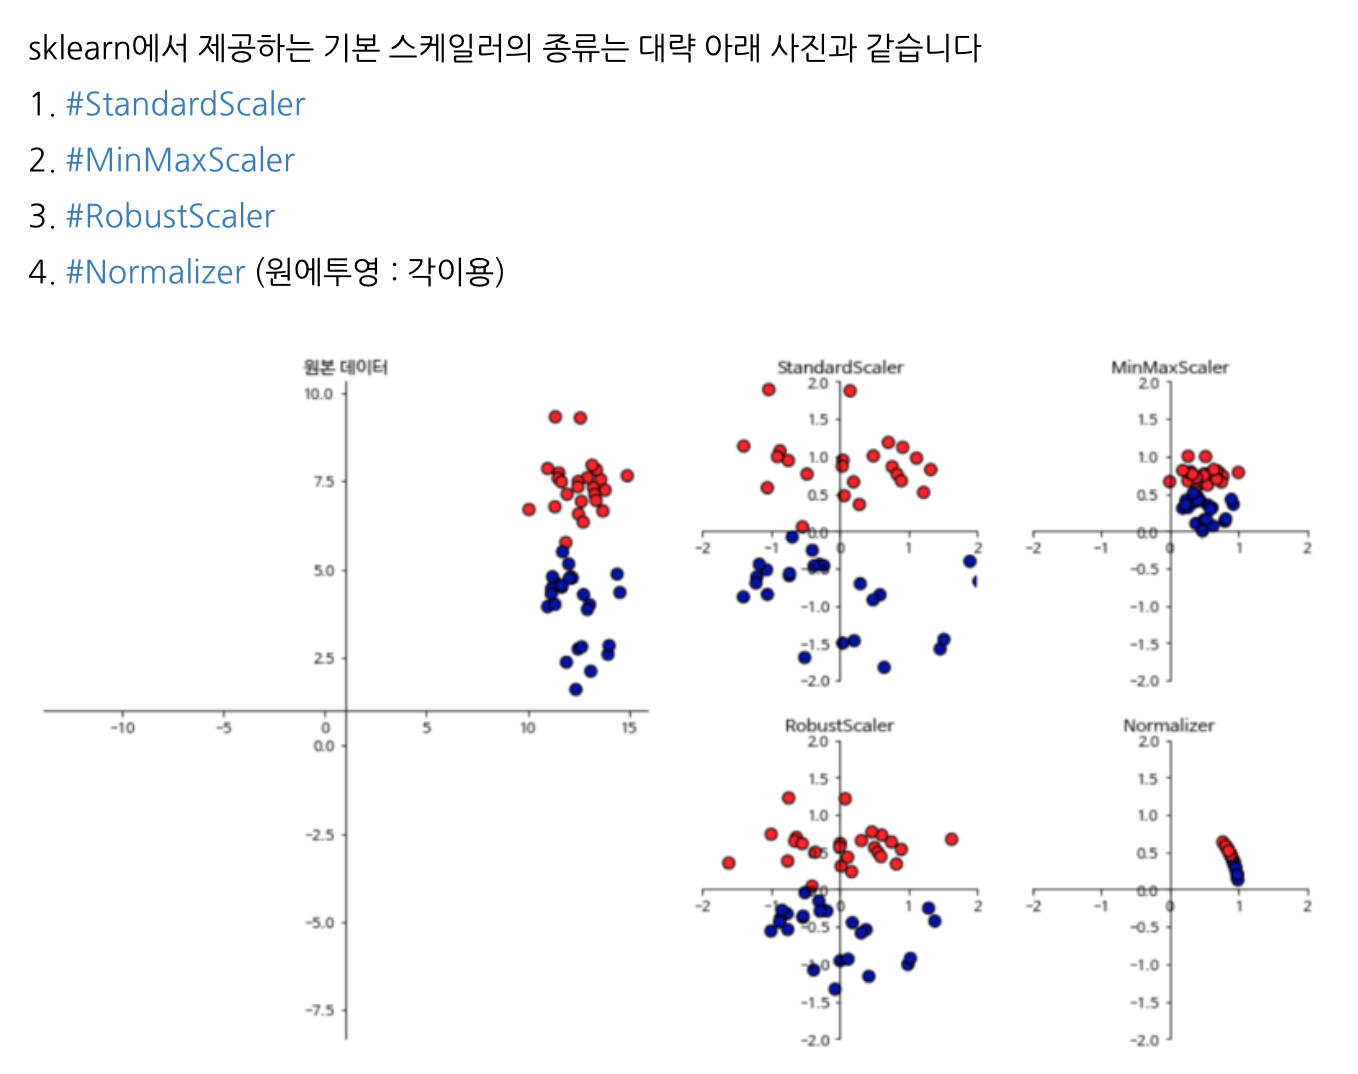

In [16]:
from IPython.display import Image  
Image("Scaler_Types.png", width = 600, height = 100)  
# ![Screen%20Shot%202022-01-30%20at%204.58.17%20PM.png](attachment:Screen%20Shot%202022-01-30%20at%204.58.17%20PM.png)

In [17]:
# 이 중에서 StandardScaler()를 사용해 스케일링할 예정 
# ----->>>>>>> 선정이유는 나중에 추가

In [18]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [19]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
X_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.425292,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.425292,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.425292,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.425292,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.425292,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662


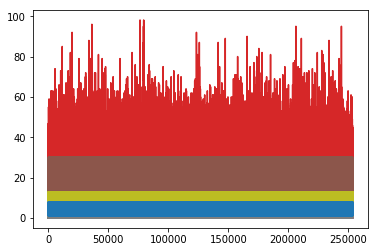

In [21]:
# 스케일링 작업 전
plt.plot(X)
plt.show()

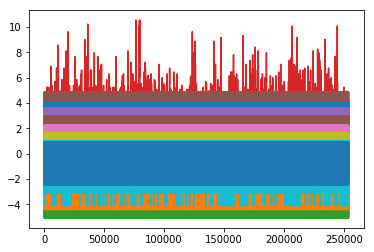

In [22]:
# 스케일링 작업 후 
plt.plot(X_scaled)
plt.show()

## 02. 데이터 전처리 : 이상치 확인 및 처리

In [23]:
l = df.columns.values
len(l)

22

### 1) Histogram

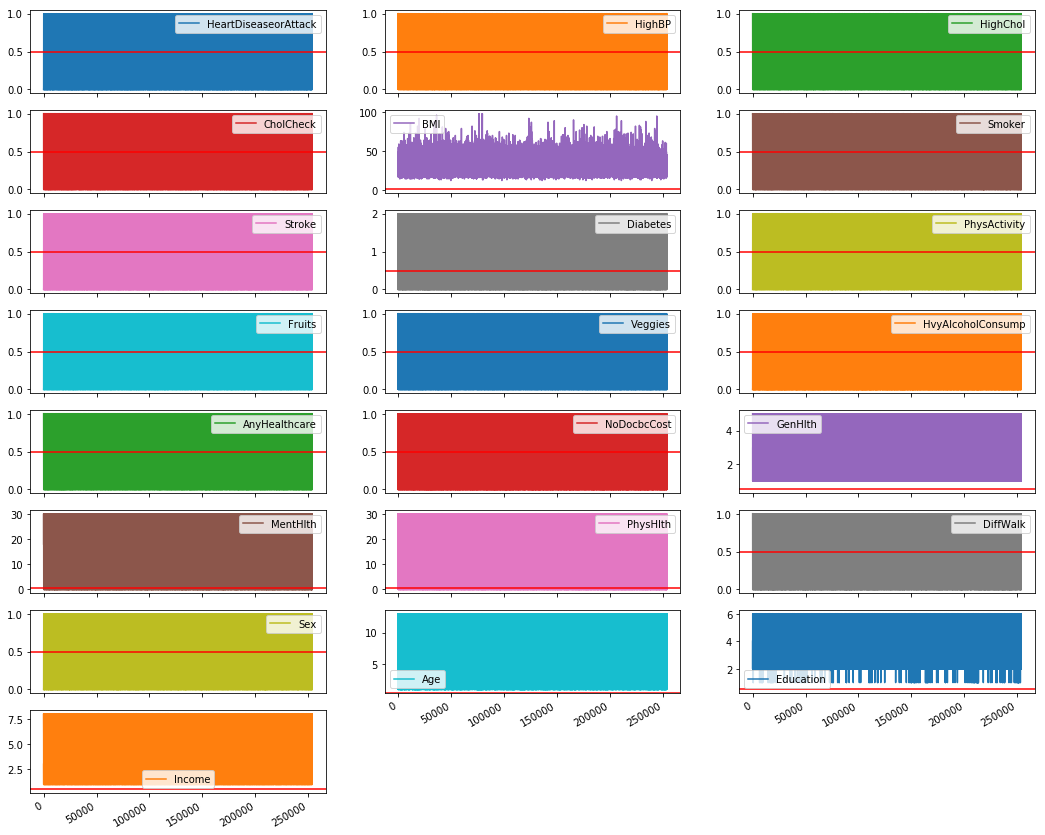

In [24]:
axes = df.plot(subplots=True, layout=(8, 3), figsize=(18,16))

for c in axes:
    for ax in c:
        ax.axhline(y=0.5, color='r')

### 2) Boxplot

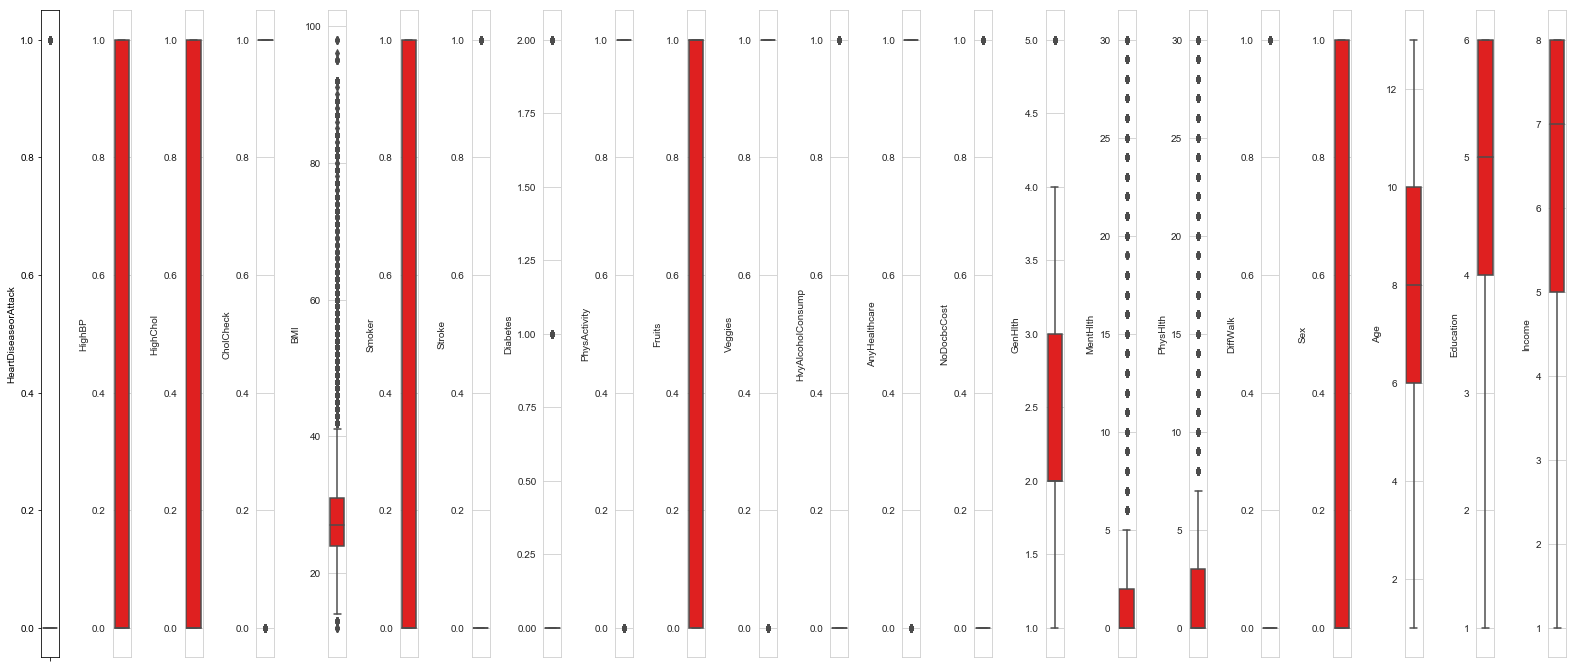

In [25]:
l = df.columns.values
number_of_columns=22
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,18*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows *2,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=df[l[i]],color='red')
    plt.tight_layout()

- **columns with no outliers  =>  HighBP, HighChol, Smoker, Fruits, Sex**
- **columns with outliers => rest of the columns, --> Especially, BMI, MentHlth, PhyHlth**

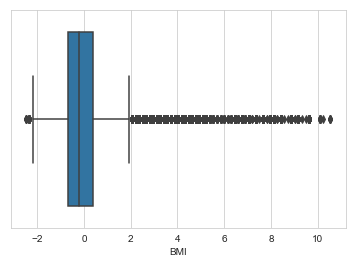

In [67]:
sns.boxplot(x=X_scaled['BMI'])

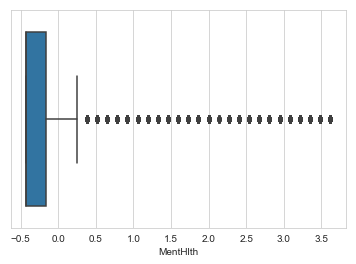

In [68]:
sns.boxplot(x=X_scaled['MentHlth'])

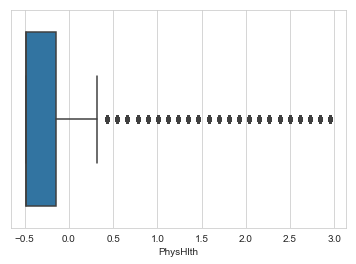

In [69]:
sns.boxplot(x=X_scaled['PhysHlth'])

### Removing Outliers with OneclassSVM()
 

In [78]:
X_scaled.shape

(253680, 22)

In [ ]:
# clf = OneClassSVM(nu=0.092, max_iter=100000).fit(X_scaled)
# outlier = clf.predict(X_scaled)
# pd.Series(clf.predict(X_scaled)).value_counts()

## 03. 기초분석

### 1) T test

In [26]:
# 정상인과 심장병 환자간 feature 평균값 비교
mean_df = pd.concat([X0.mean(),X1.mean()],axis = 1)
mean_df.columns = ['Normal','Heart_disease_patient']

print(mean_df)

                      Normal  Heart_disease_patient
HighBP              0.395588               0.750345
HighChol            0.395314               0.701168
CholCheck           0.959967               0.988658
BMI                28.269624              29.466622
Smoker              0.424837               0.619470
Stroke              0.027656               0.164776
Diabetes            0.256337               0.687231
PhysActivity        0.768625               0.640355
Fruits              0.637329               0.604696
Veggies             0.816360               0.763906
HvyAlcoholConsump   0.058350               0.035492
AnyHealthcare       0.949749               0.963588
NoDocbcCost         0.081401               0.110869
GenHlth             2.422369               3.367555
MentHlth            3.030306               4.670322
PhysHlth            3.731299               9.154439
DiffWalk            0.142567               0.414975
Sex                 0.426560               0.572887
Age         

### * 두 집단(심장병환자, 정상인 그룹)간 각 feature들의 평균 차이를 살짝 한번 보고.... 아래에서 p-val를 확인

In [27]:
X_columns = df.columns
result = scipy.stats.ttest_ind(normal_patient_df, heart_disease_patient_df, equal_var=False)
pd.DataFrame(result.pvalue,index=X_columns,columns=['p_value'])

,p_value
HeartDiseaseorAttack,0.000000e+00
HighBP,0.000000e+00
HighChol,0.000000e+00
CholCheck,4.697559e-279
BMI,2.432045e-149
Smoker,0.000000e+00
Stroke,0.000000e+00
Diabetes,0.000000e+00
PhysActivity,0.000000e+00
Fruits,8.683952e-23


### * p-value 해석 --> 
두 집단의 차이가 있다는 주장에서 p-value가 0.05(5%) 이하면 95%로 통계를 신뢰할 수 있기 때문에  두 집단 간의 유의미한 차이가 있는 것이고 0.05 이상이면 통계를 신뢰할 수 없기 때문에 차이가 있지 않다고 해석할 수 있음.

위에서 각 feature들간의 p-value를 확인해보면, 모두 0.05보다 작기 때문에 심장병환자 그룹과 정상인 그룹간 각 feature들의 value들이 유의미하게 다르다고 해석할 수 있다. 

### 3) 상관분석

In [28]:
# pearson 상관관계 
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


> t test & p-value가 과연 이 데이터셋에... 의미있는 분석방법인지 의문이네요

### 4) Heatmap

In [29]:
# 시각화 관련 source =>  https://dsbook.tistory.com/52?category=780539
# heatmap color guide => https://matplotlib.org/stable/tutorials/colors/colormaps.html
# heatmap 관련 documentation => https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### 1) 심장병환자 & 정상인을 대상으로 한 상관분석

Features with corr-value > 0.2 :
> HighBP, HighChol, BMI, Diabetes, GenHlth, MenHlth, PhyHlth, DiffWalk, Age, Education, Income

(21.5, 0.0)

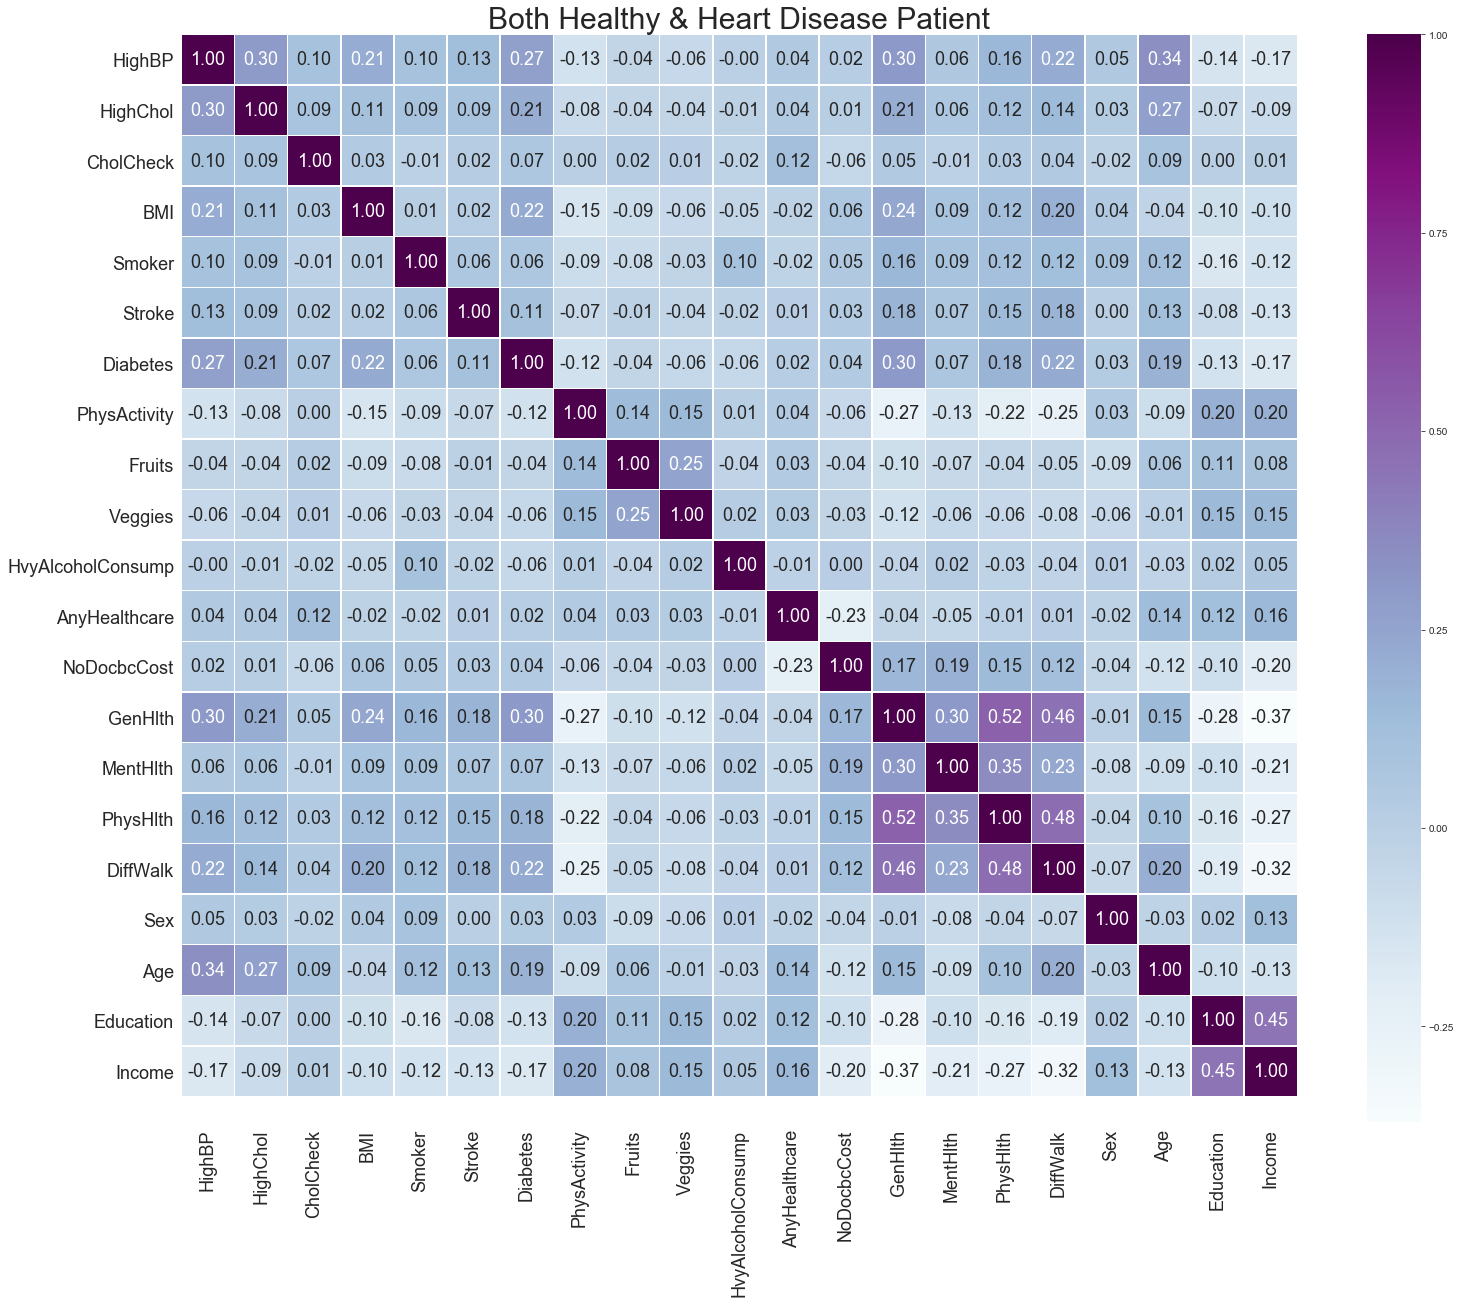

In [30]:
corr_matrix = X_scaled.corr()
fig, ax = plt.subplots(figsize=(25,20))
plt.title("Both Healthy & Heart Disease Patient", size = 30 )
ax = sns.heatmap(corr_matrix,
                 annot=True,     # 값 표기 유무
                 annot_kws={"size": 18},
                 linewidth=0.5,  # width of the lines that divides each cell
                 fmt='.2f',      # corr value sig figures
                 cmap='BuPu')  # heatmap color

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

#### 2) 정상인만을 대상으로 한 상관분석

Features with p-value > 0.2 :
> HighBP, HighChol, BMI, Diabetes, Fruits, Veggies, NoDocbcCost, GenHlth, MenHlth, PhyHlth, DiffWalk, Age*, Education, Income

(22.5, 0.0)

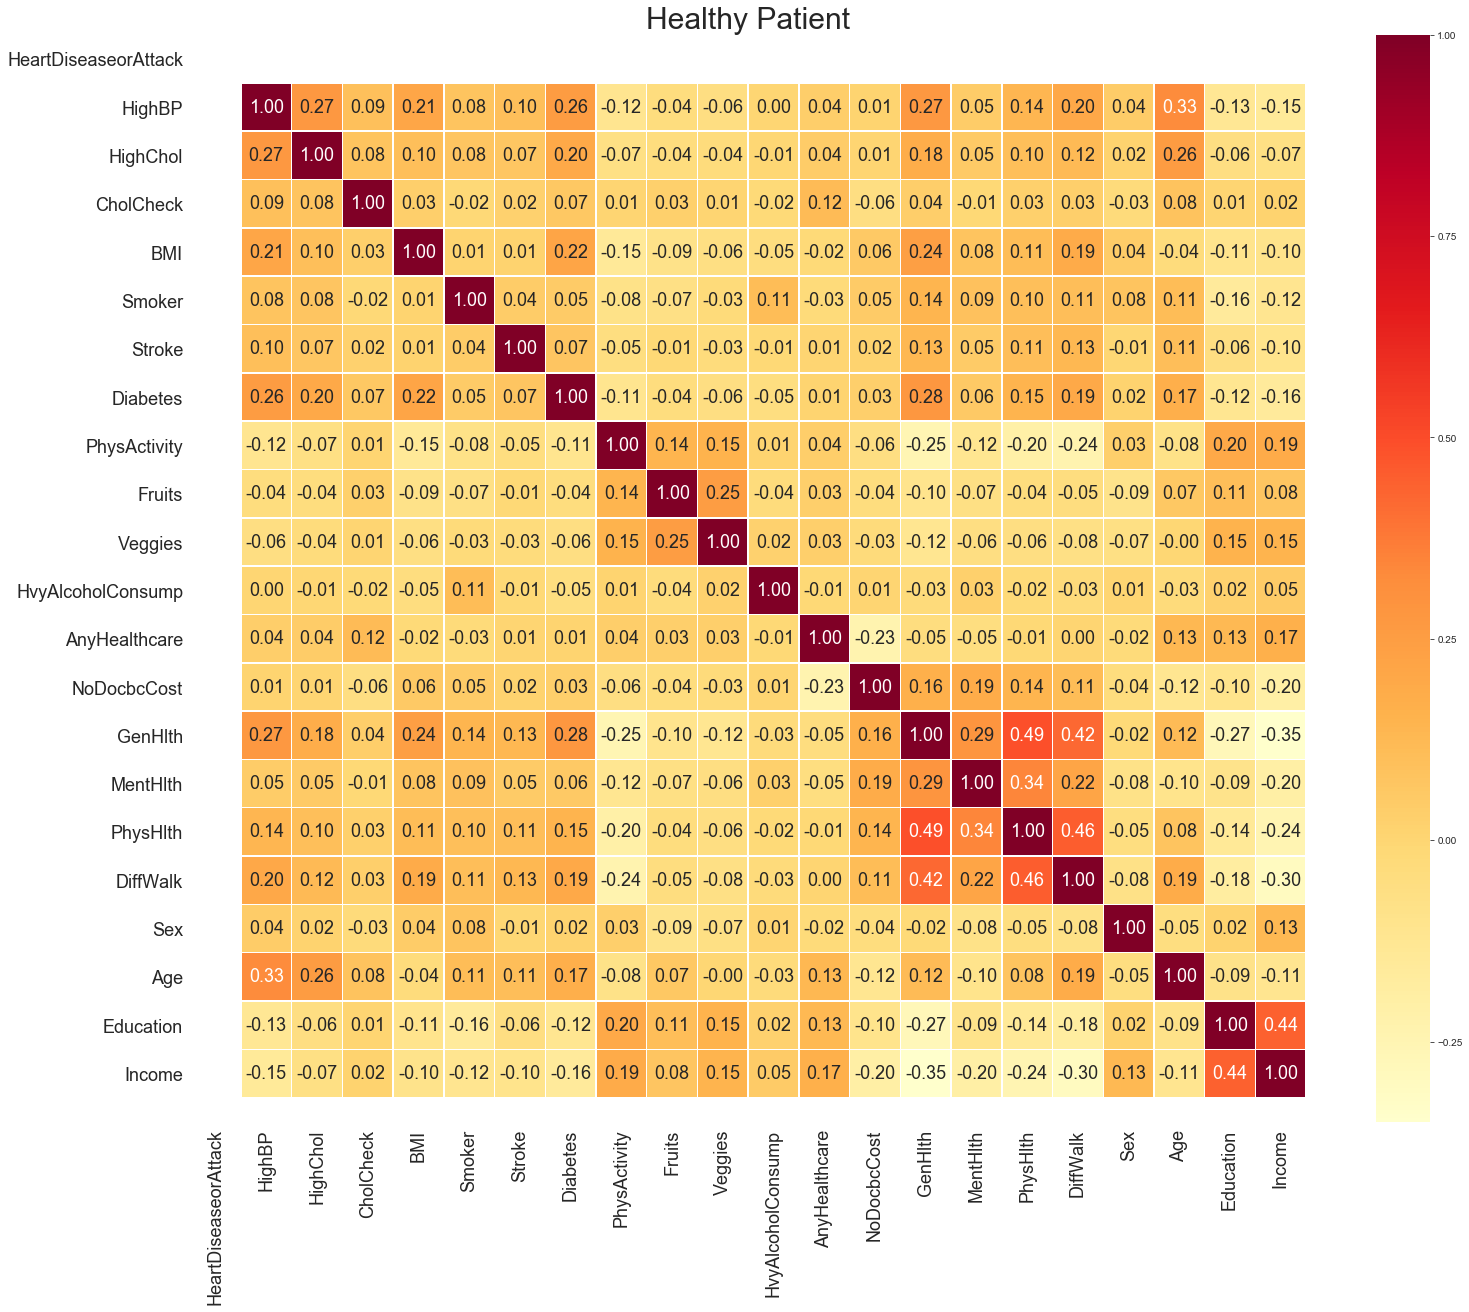

In [31]:
corr_matrix = normal_patient_df.corr()
fig, ax = plt.subplots(figsize=(25,20))
plt.title("Healthy Patient", size = 30)
ax = sns.heatmap(corr_matrix,
                 annot=True,     # 값 표기 유무
                 annot_kws={"size": 18},
                 linewidth=0.5,  # width of the lines that divides each cell
                 fmt='.2f',      # corr value sig figures
                 cmap='YlOrRd')  # heatmap color

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

#### 3) 심장병환자만을 대상으로 한 상관분석

Features with p-value > 0.2 :
> HighBP, HighChol, BMI, Diabetes, Fruits, Veggies, NoDocbcCost, GenHlth, MenHlth, PhyHlth, DiffWalk, Education, Income

(22.5, 0.0)

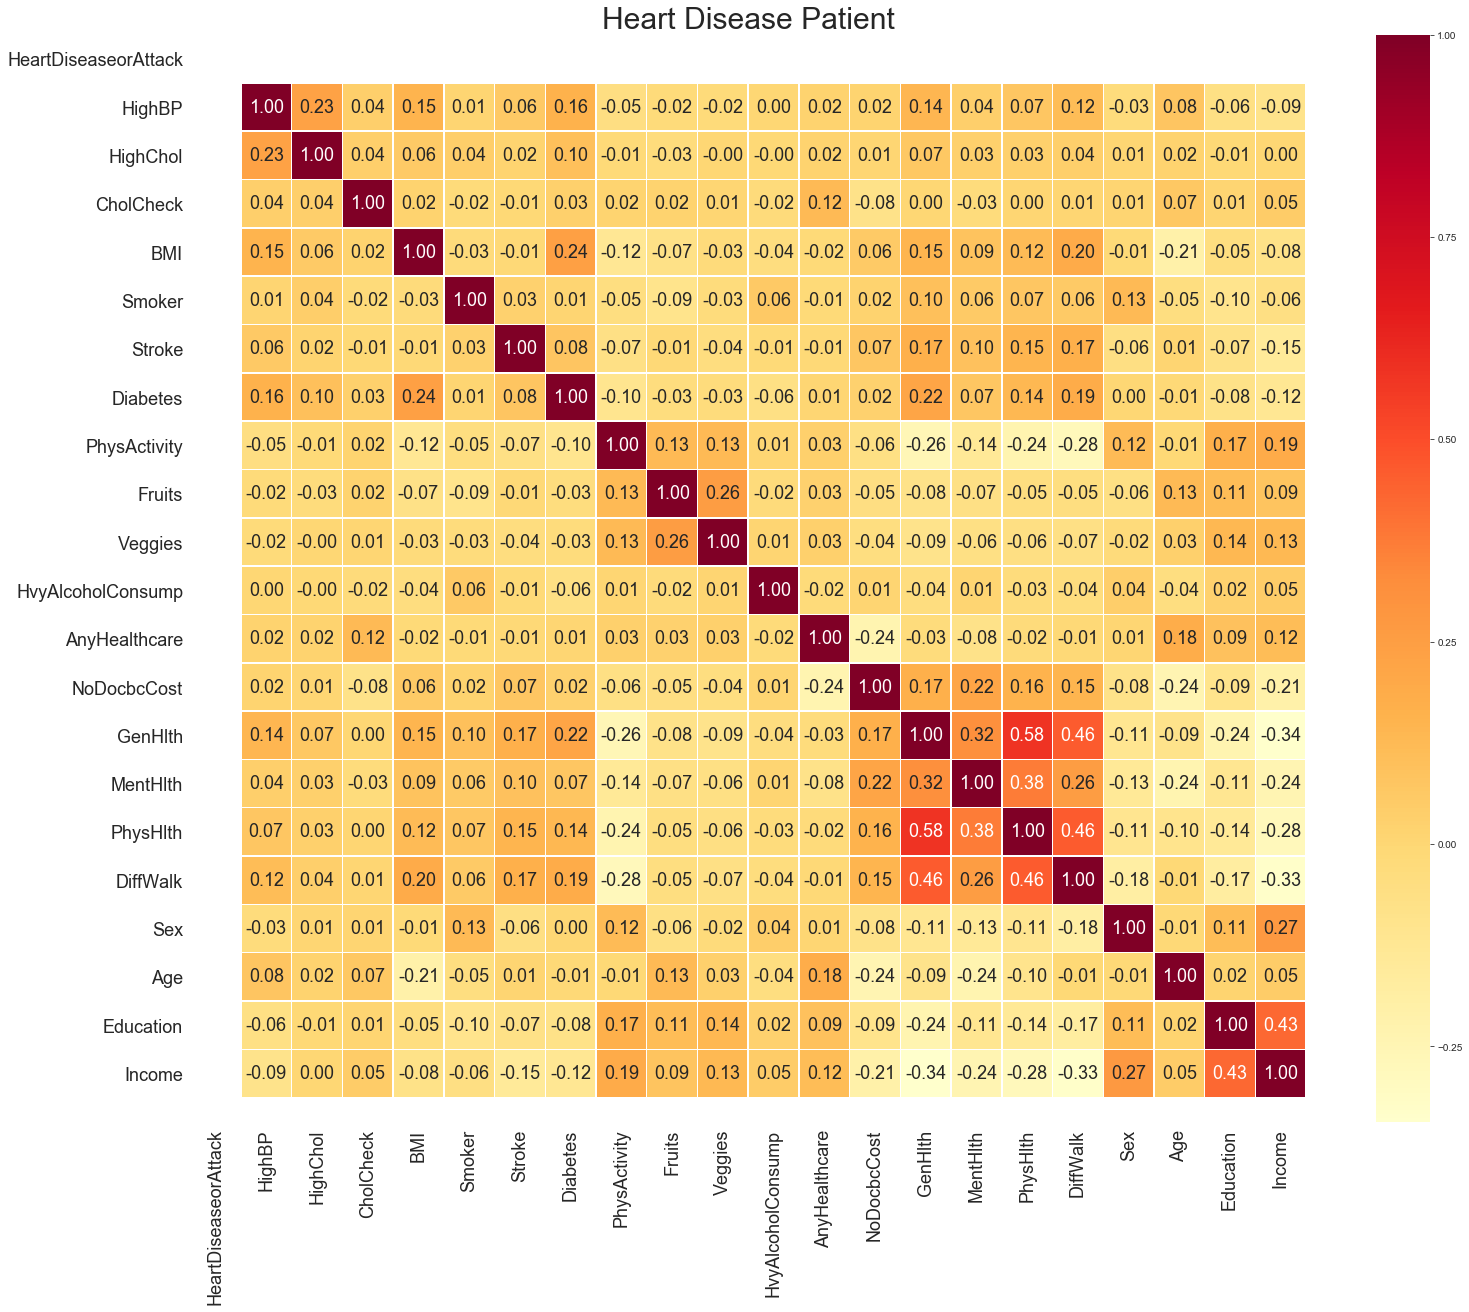

In [32]:
corr_matrix = heart_disease_patient_df.corr()
fig, ax = plt.subplots(figsize=(25,20))
plt.title("Heart Disease Patient", size = 30)
ax = sns.heatmap(corr_matrix,
                 annot=True,     # 값 표기 유무
                 annot_kws={"size": 18},  
                 linewidth=0.5,  # width of the lines that divides each cell
                 fmt='.2f',      # corr value sig figures
                 cmap='YlOrRd')  # heatmap color

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

### 5) 상관분석 결과 

<span style="color:darkblue"><span style="font-weight:bold">
(PhyHlth - GenHlth), (Diffwalk - PhyHlth), (Diffwalk - GenHlth) 이렇게 세개의 feature들 간 상관관계가 높아보인다. </span>

3개 feature들간 triangular correlation 관계가 있기에 모델링을 할 때는 이 중 하나의 feature만 사용하면 될 것으로 보인다. (모델링의 전제 조건 중 하나가 "모든 변수가 독립적이다." 이기 때문)
    
</span>

## 04. Factor Analysis (요인분석)

요인 분석을 수행하기 전에 데이터셋의 요인성을 평가해야하는데, Factorability는 데이터셋에 요인을 찾을 수 있는지를 확인하는 것이다.

1) 탐색적 요인 분석의 전제조건

- 1. 등간척도, 정규분포, 관찰치가 상호독립적이며 분산이 동일해야한다.
- 2. 모상관 행렬이 단위 행렬이라는 가설이 기가되어야한다.(KMO, Bartleet's test)
- 3. 최초 요인 추출 단계에서 얻은 고유치를 scree chart로 표현하였을때, 한 군데 이상 꺽이는 곳이 있어야 한다. 
- 4. 변수간에 높은 상관관계가 있어야 한다.(상관관계가 높은 변수들끼리 그룹화하는 것이기 때문)


2) 탐색적 요인 분석 방법 및 STEP-BY-STEP
- 1. 변수간의 상관행렬로부터 공통요인을 도출한다
- 2. 도출된 공통요인을 이용해서 변수간의 상관관계를 설명한다.
- 3. 요인부하량(factor loading)은 +-0.3 이상이면 유의하다고 본다. 

3) 탐색적 요인 분석의 목적
- 1. 자료의 요약: 변수들을 몇 개의 공통된 변인으로 묶는다.
- 2. 츨정도구 타당성 검정: 변인들의 동일한 요인으로 묶이는지 확인한다.
- 3. 변인구조 파악: 변수들의 상호관계를 파악한다.
- 4.불필요한 변인 제거: 중요도나 설명력이 낮은 변수를 제거한다.
- 5. 회귀분석이나 판별분석의 설명변수를 선택한다. 

** PCA(주성분분석)과의 차이점**

- PCA 성분은 최대 분산량을 설명하는 반면, 요인 분석은 데이터의 공분산을 설명한다.
- PCA 구성요소는 서로 완전히 직교하는 반면, 요인 분석에서는 요인이 꼭 직교하는 것은 아니다.
- PCA 성분은 관찰된 변수의 선형 조합이지만, FA에서 관찰된 변수는 관찰되지 않은 변수 또는 요인의 선형 조합이다.
- PCA 구성요소는 해석할 수 없지만, FA에서 기본 요소는 라벨링 및 해석할 수 있다.
- PCA는 일종의 차원 감소 방법이며, 요인 분석은 잠재 변수 방법이다.
- PCA는 관찰이지만, FA는 모델링 기술이다.

--> 참고문헌 : https://ysyblog.tistory.com/124


**인수 분해성(Factorability) 또는 샘플링 적절성을 확인하는 방법에는 아래와 같은 2가지 방법이 있다.**

> 1. Barlett's Test
 -  chi-square value, p-value를 계산한 후 p-value가 0.05일시 탐색적 요인분석에 적합한 데이터라고 볼 수 있다.
 
 
> 2. Kaiser-Meyer-Olkin(KMO) 검정
 - 관측된 각 변수와 전체 모델에 대한 적절성을 결정한다.
 - KMO는 관측된 모든 변수간의 분산 비율을 추정한다.
 - Barlett와는 달리 p값이 없기 때문에 판단의 기준이 따로 있다. 
 - 0.6 미만의 KMO값은 부적절한 것으로 간주되며, 0.8 이상이면 우수하다고 판단 가능하다.
 - 다만, KMO test를 하려면 변수가 최대한 3개 이상이여야 한다.


--> 아래 내용은https://github.com/yeunkyungkim/projects/blob/main/papers/Diabetes_Analysis.ipynb 에서 인용

데이터의 차원을 축소해서 각 주성분에 차지되는 요인을 알기위해 요인분석을 사용했습니다.
요인 분석 시 초기값 설정에 따라 계산 속도가 많이 영향을 받기 때문에 요인 추출 방법으로 "주성분분석"을 활용해서 초기값을 제어할 것이며, 요인행렬의 열을 단순화시키는 방식으로 베리맥스 방법을 이용하여 변수와 요인간의 관계가 명확하게 해석할 수 있도록 진행할 예정입니다.

#### 1) 심장병 환자 - Barlett's Test 

In [33]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(X1)
chi_square_value, p_value

(57993.3779966454, 0.0)

**위 심장병환자 그룹의 요인분석 결과를 보았을 때, p-value(0.0)이 significance level(0.05)보다 작기에, 해당 데이터셋이 normal distribution을 갖고 있다는 null hypythesis를 reject 할 수 있다 판단 가능함.**

--> [추가설명] Bartlett ’s test 이란

Bartlett's test of Homogeneity of Variances is a test to identify whether there are equal variances of a continuous or interval-level dependent variable across two or more groups of a categorical, independent variable. It tests the null hypothesis of no difference in variances between the groups.

When the P-Value is bigger than the significance level, we cannot reject the null hypothesis. When it is smaller, we cannot accept the null hypothesis. Here, the P-Value (0.06) is bigger than the significance level (0.05), so we cannot reject the null hypothesis that the data tested follows a normal distribution.

#### 2) 심장병 환자 - Kaiser-Meyer-Olkin(KMO) 검정

In [34]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X1)
kmo_model

0.7687278815582096

** KMO value가 0.6보다 작다면 부적합, 0.8 ~ 1이라면 적합하다고 판단할 수 있기에, 
해당 데이터셋은 요인분석을 위해 충분히? 적합한 데이터셋으로 해석할 수 있다.**

--> [추가설명] Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy 이란?

KMO는 변수들 간의 상관관계가 다른변수에 의해 잘 설명되는지 정도를 나타내는 값으로,
이 값이 작으면 요인분석을 위한 변수들의 선정이 적절치 못했다는 의미로 볼 수 있다.

일반적으로 KMO값이 0.9이상이면 상당히 좋고,
0.8-0.89면 꽤 좋은편, 0.7-0.79는 적당한 편, 0.6-0.69는 평범한 편,
0.5-0.59는 바람직하지 못한편, 0.5 미만이면 받아들일 수 없는 수치로 판단한다.

The Kaiser-Meyer-Olkin (KMO) Test is a measure of how suited your data is for Factor Analysis. ... KMO values between 0.8 and 1 indicate the sampling is adequate. KMO values less than 0.6 indicate the sampling is not adequate and that remedial action should be taken.

#### 3)  Factor Analysis 요인분석

요인분석을 하기 앞서, 몇개의 feature들이 적당할지 보기 위해 아래와 같이 get_eigenvalues()를 사용해 확인해보았다.

In [37]:
ev, v = fa1.get_eigenvalues()
ev

array([3.29623984, 1.57822659, 1.37909778, 1.31614775, 1.17720572,
       1.12166893, 0.99117606, 0.97176898, 0.9637719 , 0.92099787,
       0.8536752 , 0.80945995, 0.76043873, 0.73709571, 0.71936391,
       0.70348982, 0.68507896, 0.59912372, 0.52041757, 0.49979553,
       0.39575951])

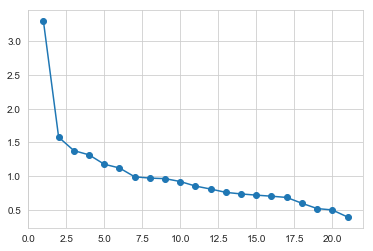

In [38]:
plt.scatter(range(1, X1.shape[1]+1), ev)
plt.plot(range(1, X1.shape[1]+1), ev)
plt.show()
# 참고 사이트 : https://ysyblog.tistory.com/124

** Eigen 값이 1 이상일 때까지, 또는 그래프 기울기가 완만해지기 전까지 나누어야 데이터 결함을 최소화할 수 있기에, 위 그래프를 보아하니 6 정도가 적당해보인다.**

위 eigenvalues()의 결과로 n_factors = 6으로 설정하였고, method = "principal", rotation = "varimax" 로 설정한 후 FactorAnalyzer()를 사용해보았다.

In [39]:
fa1 = FactorAnalyzer(n_factors=6, method="principal", rotation="varimax")
fa1.fit(X1)

FactorAnalyzer(method='principal', n_factors=6, rotation='varimax',
               rotation_kwargs={})

In [40]:
fa1.loadings_

array([[ 6.24420328e-02,  1.73584560e-02, -6.95851212e-02,
         3.63792146e-04, -1.61153388e-02,  7.38763498e-01],
       [-1.77198921e-02, -1.81016700e-02, -2.93749628e-02,
         6.50011274e-02,  1.74113336e-01,  6.78669559e-01],
       [ 5.68697235e-02,  4.03384194e-01,  8.87478002e-02,
        -3.53653480e-03, -5.95026146e-02,  5.57052119e-02],
       [ 1.87374326e-01, -3.39042639e-02,  5.80266382e-01,
        -1.57775741e-01, -2.94007046e-01,  3.19807604e-01],
       [ 1.66744925e-01, -1.07833791e-02, -1.09348363e-01,
        -1.62613623e-01,  6.50260047e-01,  6.50495938e-02],
       [ 2.98127174e-01, -2.77550083e-02, -2.53092379e-01,
         4.36274875e-02,  7.77559039e-02,  1.12157153e-01],
       [ 2.33046620e-01,  1.04197368e-01,  2.51979528e-01,
        -1.07364446e-01, -1.94755432e-01,  4.62063649e-01],
       [-3.94997859e-01, -8.39953516e-02,  4.35089256e-02,
         3.65798797e-01,  1.21088999e-01,  8.65380430e-03],
       [-4.48532835e-03,  5.13944190e-02, -1.727

In [41]:
efa_result1 = pd.DataFrame(fa1.loadings_, index=X1.columns)
efa_result1

,0,1,2,3,4,5
HighBP,0.062442,0.017358,-0.069585,0.000364,-0.016115,0.738763
HighChol,-0.017720,-0.018102,-0.029375,0.065001,0.174113,0.678670
CholCheck,0.056870,0.403384,0.088748,-0.003537,-0.059503,0.055705
BMI,0.187374,-0.033904,0.580266,-0.157776,-0.294007,0.319808
Smoker,0.166745,-0.010783,-0.109348,-0.162614,0.650260,0.065050
Stroke,0.298127,-0.027755,-0.253092,0.043627,0.077756,0.112157
Diabetes,0.233047,0.104197,0.251980,-0.107364,-0.194755,0.462064
PhysActivity,-0.394998,-0.083995,0.043509,0.365799,0.121089,0.008654
Fruits,-0.004485,0.051394,-0.172766,0.681145,-0.171115,-0.012919
Veggies,-0.010844,-0.010530,0.011616,0.718537,-0.015737,0.047646


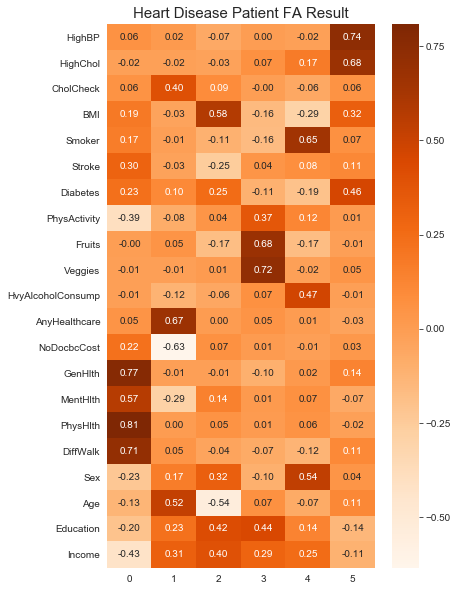

In [45]:
plt.figure(figsize=(6,10))
plt.title("Heart Disease Patient FA Result", size = 15)
sns.heatmap(efa_result1, cmap="Oranges", annot=True, fmt='.2f')

<span style="color:blue"><span style="font-weight:bold">
Heart Disease Patient - FA Loading Result 해석</span>
    
-  FA 0 : GenHlth, MenHlth, PhysHlth, DiffWalk
-  FA 1 : AnyHealthcare
-  FA 2 : BMI
-  FA 3 : Fruit, Veggies
-  FA 4 : Smoker
-  FA 5 : HighBP, HighChol

</span>

**아래는, 정상인 데이터셋으로 요인분석 진행해보았다.**

In [44]:
chi_square_value,p_value = calculate_bartlett_sphericity(X0)
chi_square_value, p_value

(566075.5466369701, 0.0)

In [45]:
kmo_all,kmo_model=calculate_kmo(X0)
kmo_model

0.7833412671094137

In [52]:
fa0 = FactorAnalyzer(n_factors=6, method="principal", rotation="varimax")
fa0.fit(X0)

FactorAnalyzer(method='principal', n_factors=6, rotation='varimax',
               rotation_kwargs={})

In [53]:
fa0.loadings_

array([[ 7.29724969e-02,  7.79088409e-02, -2.08573525e-02,
        -1.62168430e-01,  6.76099058e-02,  6.84648063e-01],
       [ 4.12265113e-02,  1.03222852e-01,  4.65524987e-02,
        -8.43634703e-02,  1.39412720e-01,  5.75006267e-01],
       [ 7.09055026e-02,  3.53816809e-01,  3.54857197e-02,
        -7.59325838e-03, -1.39192427e-01,  1.55541159e-01],
       [ 2.27700425e-01, -1.48127378e-01, -2.13392572e-01,
         2.75319925e-01, -2.76718611e-01,  4.85406116e-01],
       [ 9.57598079e-02, -9.90949202e-02, -8.71690603e-02,
        -1.71188015e-01,  6.63562224e-01,  1.26502061e-01],
       [ 1.48812992e-01,  1.10928596e-01,  1.27586403e-02,
        -2.33444596e-01,  1.08547347e-01,  1.02088966e-01],
       [ 1.52605407e-01, -3.21115814e-02, -4.41459155e-02,
        -2.94552572e-02, -1.49185395e-01,  6.06101828e-01],
       [-2.90573280e-01, -3.86441808e-02,  4.25327007e-01,
         2.22656908e-01,  4.07368740e-02, -7.04390392e-02],
       [-4.89440282e-02,  2.22298567e-02,  6.960

In [54]:
efa_result0 = pd.DataFrame(fa0.loadings_, index=X0.columns)
efa_result0

,0,1,2,3,4,5
HighBP,0.072972,0.077909,-0.020857,-0.162168,0.067610,0.684648
HighChol,0.041227,0.103223,0.046552,-0.084363,0.139413,0.575006
CholCheck,0.070906,0.353817,0.035486,-0.007593,-0.139192,0.155541
BMI,0.227700,-0.148127,-0.213393,0.275320,-0.276719,0.485406
Smoker,0.095760,-0.099095,-0.087169,-0.171188,0.663562,0.126502
Stroke,0.148813,0.110929,0.012759,-0.233445,0.108547,0.102089
Diabetes,0.152605,-0.032112,-0.044146,-0.029455,-0.149185,0.606102
PhysActivity,-0.290573,-0.038644,0.425327,0.222657,0.040737,-0.070439
Fruits,-0.048944,0.022230,0.696046,-0.120273,-0.126256,-0.009516
Veggies,0.000416,-0.035103,0.724793,0.128385,0.055973,0.018928


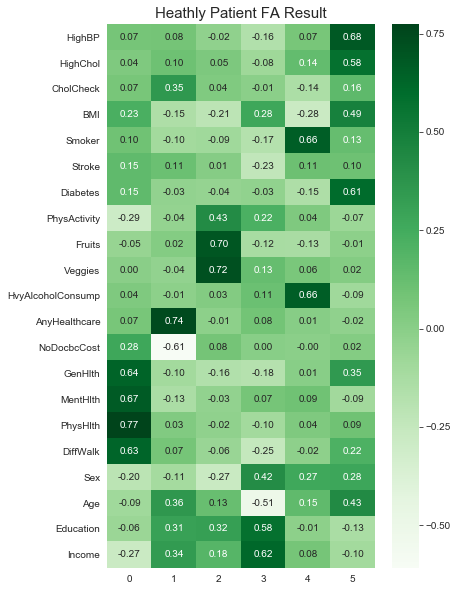

In [55]:
plt.figure(figsize=(6,10))
plt.title("Heathly Patient FA Result", size = 15)
sns.heatmap(efa_result0, cmap="Greens", annot=True, fmt='.2f')

<span style="color:blue"><span style="font-weight:bold">
Heathly Patient - FA Loading Result 해석</span>
    
-  FA 0 : GenHlth, MenHlth, PhysHlth, DiffWalk
-  FA 1 : AnyHealthcare
-  FA 2 : Fruits, Veggies
-  FA 3 : Income, Education
-  FA 4 : Smoker, HvyAlcoholConsump
-  FA 5 : HighBP, HighChol, Diabetes

</span>

## 05. 클러스터 분석

#### 1) 정상인을 대상으로 한 클러스터 분석

In [97]:
clustering_normal_df = normal_patient_df[normal_patient_df.columns].T

In [98]:
clustering_normal_df

,0,1,2,3,4,5,6,7,9,10,...,253665,253666,253667,253669,253673,253674,253675,253676,253677,253678
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
HighChol,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
CholCheck,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0,25.0,30.0,25.0,24.0,25.0,...,17.0,23.0,28.0,27.0,42.0,27.0,45.0,18.0,28.0,23.0
Smoker,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Diabetes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Fruits,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


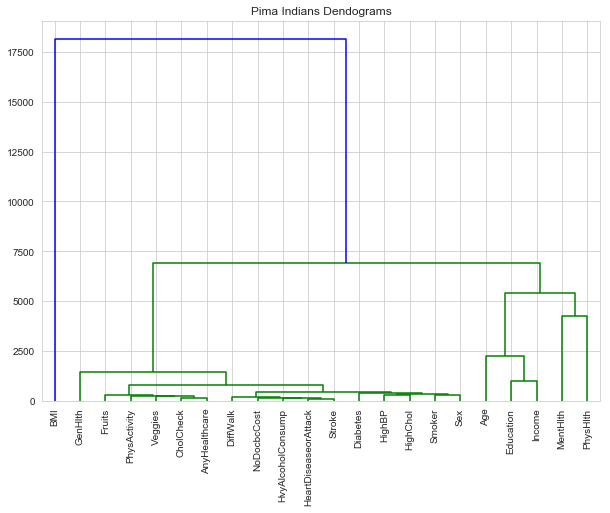

In [99]:
plt.figure(figsize=(10, 7))
plt.title("Pima Indians Dendograms")
dend = shc.dendrogram(shc.linkage(clustering_normal_df, method='ward'),labels=clustering_normal_df.index)
plt.xticks(rotation=90)
plt.show()

In [100]:
cluster_normal = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_normal_result = cluster_normal.fit_predict(clustering_normal_df)

In [102]:
den_normal_df = pd.DataFrame([clustering_normal_df.index.tolist(),clustering_normal_result.tolist()]).T
den_normal_df.columns = ['feature_name','cluster']
den_normal_df.sort_values(by=['cluster'])

,feature_name,cluster
21,Income,0
19,Age,0
16,PhysHlth,0
15,MentHlth,0
20,Education,0
4,BMI,1
18,Sex,2
17,DiffWalk,2
14,GenHlth,2
13,NoDocbcCost,2


In [114]:
den_normal_df['feature_name'] = den_normal_df['feature_name'] + ", "

In [115]:
den_normal_df.groupby('cluster')['feature_name'].sum()

cluster
0         MentHlth, PhysHlth, Age, Education, Income, 
1                                                BMI, 
2    HeartDiseaseorAttack, HighBP, HighChol, CholCh...
Name: feature_name, dtype: object

**>  정상인 환자들을 3개의 군집으로 나눈다면,**
- cluster 1 : MentHlth, PhysHlth, Age, Education, Income
- cluster 2 : BMI
- cluster 3 : 나머지 features

#### 2) 심장병환자를 대상으로 한 클러스터 분석

In [106]:
clustering_heart_disease_patient_df = heart_disease_patient_df[heart_disease_patient_df.columns[:-2]].T

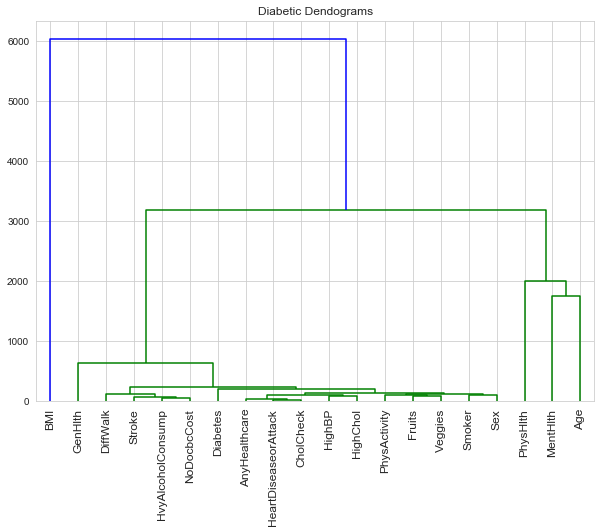

In [113]:
plt.figure(figsize=(10, 7))
plt.title("Diabetic Dendograms")
dend = shc.dendrogram(shc.linkage(clustering_heart_disease_patient_df, method='ward'),labels=clustering_heart_disease_patient_df.index)
plt.xticks(rotation=90)
plt.show()

In [108]:
cluster_heart_disease_patient = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_heart_disease_patient_result = cluster_heart_disease_patient.fit_predict(clustering_heart_disease_patient_df)

In [110]:
den_heart_disease_patient_df = pd.DataFrame([clustering_heart_disease_patient_df.index.tolist(),clustering_heart_disease_patient_result.tolist()]).T
den_heart_disease_patient_df.columns = ['feature_name','cluster']
den_heart_disease_patient_df.sort_values(by=['cluster'])

,feature_name,cluster
19,Age,0
16,PhysHlth,0
15,MentHlth,0
4,BMI,1
17,DiffWalk,2
14,GenHlth,2
13,NoDocbcCost,2
12,AnyHealthcare,2
11,HvyAlcoholConsump,2
10,Veggies,2


In [111]:
den_heart_disease_patient_df['feature_name'] = den_heart_disease_patient_df['feature_name'] + ", "

In [112]:
den_heart_disease_patient_df.groupby('cluster')['feature_name'].sum()


cluster
0                            MentHlth, PhysHlth, Age, 
1                                                BMI, 
2    HeartDiseaseorAttack, HighBP, HighChol, CholCh...
Name: feature_name, dtype: object

**>  심장병 환자들을 3개의 군집으로 나눈다면,**
- cluster 1 : MentHlth, PhysHlth, Age
- cluster 2 : BMI
- cluster 3 : 나머지 features

### 여기까지 Overall, 

**MentHlth, PhyHlth은 유사한 형태의 feature, 또 서로간 높은 상관관계를 가지는 feature들로서 이 중 하나의 feature만 추려볼 수 있을 것 같아보인다.**

**또, 상관관계 분석과 fa loading 결과에서 계속해 유의미한 feature로 나타났던 BMI도 해당 데이터셋에서 심장병 유무를 결정짓는 대표 feature로 추려볼 수 있을 것 같다. **

이 외에도 secondary feature들로는 AnyHealthCare, Fruit/Veggies, Smoker, HighBP, Education/Income이 있는 것으로 분석된다.**

## 06. 결정트리 특정 중요도 평가

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

**Decision Tree 학습**

overfitting 방지를 위해 길이를 3으로 제한하고 학습을 진행해보겠다.

In [82]:
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)  
clf.fit(X_train, y_train)  
print("train score:",clf.score(X_train, y_train))  
print("test score:",clf.score(X_test, y_test))  

train score: 0.9063866090077369
test score: 0.9070059129188317


In [84]:
feature_importance_df = pd.DataFrame([X.columns.tolist() , clf.feature_importances_.tolist()]).T
feature_importance_df.columns = ['feature','importance']

In [85]:
feature_importance_df

,feature,importance
0,HighBP,0.0102523
1,HighChol,0
2,CholCheck,0
3,BMI,0
4,Smoker,0
5,Stroke,0.156092
6,Diabetes,0
7,PhysActivity,0
8,Fruits,0
9,Veggies,0


**--> Decision Tree의 특성 중요도 결과, HighBP, Stroke, GenHlth, Sex, Age 컬럼들의 중요도가 높게 측정된다.** 

## 07. SWM 서포트벡터머신

심장병에 대해서 각 요인이 미치는 영향을 조사하기 위해서 서포트 백터 머신을 이용해 각요인을 1개씩 제거하여 나머지 7개에 대한 정확도를 측정하였습니다. 요인의 영향도가 크면 그만큼 7개에 대한 정확도가 낮을 것으로 보여집니다.

In [ ]:
clf = svm.SVC(gamma='auto',C=0.1)
clf.fit(X_train, y_train)

print("train score:",clf.score(X_train, y_train))  
print("test score:",clf.score(X_test, y_test))  